<a href="https://colab.research.google.com/github/naruto1206/Homework-CNN-AI/blob/main/CNN_10_FRUITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import random
import os

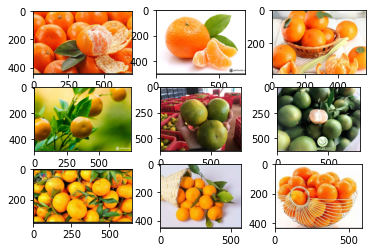

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/Data-10-fruits/train/quyt/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'quyt' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-10-fruits/train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/Data-10-fruits/validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 240 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_30 (Bat  (None, 198, 198, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_31 (Bat  (None, 97, 97, 64)     

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor="accuracy", patience=0.98),
 ModelCheckpoint(filepath="",
 monitor="val_acc",
save_best_only=True)]

In [ ]:
history=model.fit(train_dataset,batch_size=100,epochs=20,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/20
24/24 [==============================] - 36s 1s/step - loss: 2.7695 - accuracy: 0.2458 - val_loss: 7.9731 - val_accuracy: 0.1000
Epoch 2/20
24/24 [==============================] - 36s 1s/step - loss: 1.6407 - accuracy: 0.4875 - val_loss: 15.3929 - val_accuracy: 0.1000
Epoch 3/20
24/24 [==============================] - 37s 2s/step - loss: 1.4418 - accuracy: 0.5625 - val_loss: 12.8034 - val_accuracy: 0.1000
Epoch 4/20
24/24 [==============================] - 36s 1s/step - loss: 1.2771 - accuracy: 0.6042 - val_loss: 7.7230 - val_accuracy: 0.1000
Epoch 5/20
24/24 [==============================] - 35s 1s/step - loss: 0.9596 - accuracy: 0.7292 - val_loss: 6.1951 - val_accuracy: 0.1000
Epoch 6/20
24/24 [==============================] - 34s 1s/step - loss: 0.6488 - accuracy: 0.7542 - val_loss: 8.8497 - val_accuracy: 0.1000
Epoch 7/20
24/24 [==============================] - 35s 1s/step - loss: 0.4706 - accuracy: 0.8625 - val_loss: 8.2565 - val_accuracy: 0.1000
Epoch 8/20
24/24 [

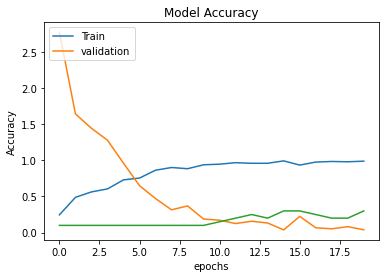

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()


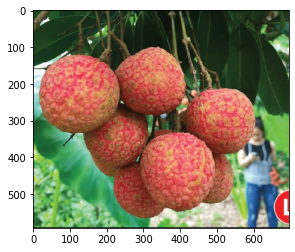

Day la goi vai


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-fruits/validation/vai/vai1.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la buoi')
elif kq ==1:
  print('Day la hong xiem')
elif kq ==2:
  print('Day la mang cut')
elif kq ==3:
  print('Day la mit')
elif kq ==4:
  print('Day la quyt')
elif kq ==5:
  print('Day la sau rieng')
elif kq ==6:
  print('Day la thanh long')
elif kq ==7:
  print('Day la vai')
elif kq ==8:
  print('Day la vu sua')
elif kq ==9:
  print('Day la xoai')

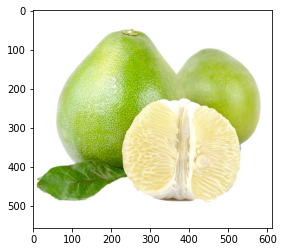

Day la buoi


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/Data-10-fruits/validation/buoi/buoi7.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la buoi')
elif kq ==1:
  print('Day la hong xiem')
elif kq ==2:
  print('Day la mang cut')
elif kq ==3:
  print('Day la mit')
elif kq ==4:
  print('Day la quyt')
elif kq ==5:
  print('Day la sau rieng')
elif kq ==6:
  print('Day la thanh long')
elif kq ==7:
  print('Day la vai')
elif kq ==8:
  print('Day la vu sua')
elif kq ==9:
  print('Day la xoai')

In [ ]:
model.save('fruit_rec_20epochs.h5')